<img src="../images/nashville_accident.png"/>

### Which of Nashville's zip codes had the highest concentration of traffic fatalities 2019?

Pseudocode:
    
    1. Browse data.nashville.gov
    2. Identify question
    3. Setup environment
    4. Import needed dataframes
    5. Explore data
    6. Merge dataframes
    7. Slice 'n dice
    8. Plot data
    9. Heatmap it
    10. Answer question
    

#### importing packages

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

#### loading dataframes, checking shapes

In [2]:
accidents_df = gpd.read_file('../data/traffic_accidents_2019.geojson')
accidents_df.shape

(34692, 25)

In [3]:
zipcodes_df = gpd.read_file('../data/zipcodes.geojson')
zipcodes_df.shape

(56, 6)

#### exploring each dataframe in more detail

In [26]:
accidents_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34692 entries, 0 to 34691
Data columns (total 25 columns):
harmful_codes                 34692 non-null object
zip_code                      34658 non-null object
rpa                           34681 non-null object
latitude                      34670 non-null object
harmful_codes_description     34333 non-null object
weather_description           34641 non-null object
number_of_injuries            34692 non-null object
collision_type                34688 non-null object
date_and_time                 34692 non-null object
reporting_officer             34684 non-null object
longitude                     34670 non-null object
hit_and_run                   34691 non-null object
number_of_motor_vehicles      34692 non-null object
precinct                      34681 non-null object
accident_number               34692 non-null object
city_name                     34692 non-null object
collision_type_description    34688 non-null object

In [5]:
zipcodes_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
zip               56 non-null object
objectid          56 non-null object
po_name           56 non-null object
shape_stlength    56 non-null object
shape_starea      56 non-null object
geometry          56 non-null geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


In [6]:
accidents_df.head(3)

,harmful_codes,zip_code,rpa,latitude,harmful_codes_description,weather_description,number_of_injuries,collision_type,date_and_time,reporting_officer,...,city_name,collision_type_description,illumination_description,street_address,number_of_fatalities,weather,property_damage,illumination,state_name,geometry
0,12,37013,8753,36.0449,MOTOR VEHICLE IN TRANSPORT,CLEAR,0,4,2019-01-15T19:40:00,256374,...,ANTIOCH,ANGLE,DARK - LIGHTED,BELL RD & CEDAR POINTE PKWY,0,21,None,3,TN,POINT (-86.66710 36.04490)
1,14,37214,8955,36.1531,PARKED MOTOR VEHICLE,RAIN,0,11,2019-01-17T23:09:00,405424,...,NASHVILLE,Front to Rear,DARK - LIGHTED,3248 PERCY PRIEST DR,0,2,None,3,TN,POINT (-86.62910 36.15310)
2,14,37204,8305,36.1122,PARKED MOTOR VEHICLE,CLEAR,0,6,2019-01-20T12:57:00,834798,...,NASHVILLE,SIDESWIPE - OPPOSITE DIRECTION,DAYLIGHT,700 THOMPSON LN,0,21,None,1,TN,POINT (-86.76250 36.11220)


In [7]:
zipcodes_df.head(3)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."


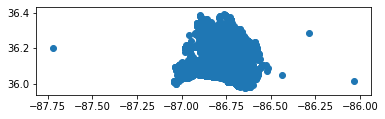

In [8]:
accidents_df.plot()

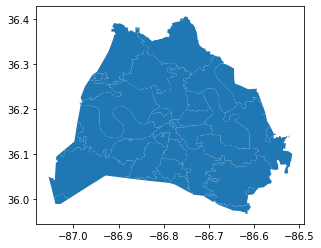

In [9]:
zipcodes_df.plot();

#### merging accidents_df (points) and zipcodes_df (polygons) into one dataframe

In [24]:
az_df = gpd.sjoin(accidents_df, 
                  zipcodes_df, 
op = 'within')
az_df.shape

(34629, 31)

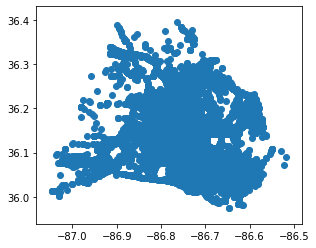

In [25]:
az_df.plot()

#### dropping some unnesessary columns

In [12]:
az_df.columns

Index(['harmful_codes', 'zip_code', 'rpa', 'latitude',
       'harmful_codes_description', 'weather_description',
       'number_of_injuries', 'collision_type', 'date_and_time',
       'reporting_officer', 'longitude', 'hit_and_run',
       'number_of_motor_vehicles', 'precinct', 'accident_number', 'city_name',
       'collision_type_description', 'illumination_description',
       'street_address', 'number_of_fatalities', 'weather', 'property_damage',
       'illumination', 'state_name', 'geometry', 'index_right', 'zip',
       'objectid', 'po_name', 'shape_stlength', 'shape_starea'],
      dtype='object')

In [43]:
az_df.drop(['harmful_codes', 
            'rpa', 
            'collision_type', 
            'reporting_officer',
            'hit_and_run',
            'number_of_motor_vehicles', 
            'precinct', 
            'accident_number',
            'illumination_description',
            'property_damage',
            'illumination',
            'po_name',],
axis=1).head(3)
az_df.shape

(34629, 31)

In [42]:
az_df = az_df[az_df.number_of_fatalities !=0]
az_df.shape

(34629, 31)

In [19]:
# stumped I think ^